# Introdução

#### Aluna: Júlia Roberta Quoos Alves 
#### Conjunto de dados: Online Shoppers Purchasing Intention Dataset Data Set
#### Data: 10/05/2023

In [ ]:
# Instalação e importação das bibliotecas 
# pip install pycaret

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pycaret.classification import *

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import ComplementNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import CategoricalNB 

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

In [2]:
# Importação do Conjunto de dados 1: Online Shoppers Purchasing Intention Dataset Data Set
dados = pd.read_csv('online_shoppers_intention.csv', sep=',')
dados.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [3]:
dados.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


# Limpeza dos dados

### Vendo o tipo das variáveis

In [4]:
# Verificando a existência de nulos
dados.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [5]:
# Mostrando os tipos dos dados
dados.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

In [6]:
#Mudando o tipo de variável do VisitorType
dados.groupby(['VisitorType']).size()

VisitorType
New_Visitor           1694
Other                   85
Returning_Visitor    10551
dtype: int64

In [7]:
labelencoder = LabelEncoder()
dados['VisitorType'] = labelencoder.fit_transform(dados['VisitorType'])
dados['VisitorType']

0        2
1        2
2        2
3        2
4        2
        ..
12325    2
12326    2
12327    2
12328    2
12329    0
Name: VisitorType, Length: 12330, dtype: int32

In [8]:
#Mudando o tipo de variável do Month
dados.groupby(['Month']).size()

Month
Aug      433
Dec     1727
Feb      184
Jul      432
June     288
Mar     1907
May     3364
Nov     2998
Oct      549
Sep      448
dtype: int64

In [9]:
labelencoder = LabelEncoder()
dados['Month'] = labelencoder.fit_transform(dados['Month'])
dados['Month']

0        2
1        2
2        2
3        2
4        2
        ..
12325    1
12326    7
12327    7
12328    7
12329    7
Name: Month, Length: 12330, dtype: int32

In [10]:
labelencoder = LabelEncoder()
dados['Revenue'] = labelencoder.fit_transform(dados['Revenue'])
dados['Revenue']

0        0
1        0
2        0
3        0
4        0
        ..
12325    0
12326    0
12327    0
12328    0
12329    0
Name: Revenue, Length: 12330, dtype: int64

In [11]:
# Visualizando novamente os tipos de dados
dados.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                        int32
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                  int32
Weekend                       bool
Revenue                      int64
dtype: object

# Classificação

## Separação em base de treino e base de teste

In [12]:
atributos = ["ProductRelated", "ProductRelated_Duration", "BounceRates", "ExitRates", "SpecialDay", "Month", "OperatingSystems", "Browser", "Region", "TrafficType", "VisitorType", "Weekend"]

In [13]:
# Cuidar na hora de particionar a base para o teste 
# A base tem mais de 80% dos dados na classe 0
dados.groupby(['Revenue']).size()

Revenue
0    10422
1     1908
dtype: int64

In [14]:
X = dados[atributos]
y = dados['Revenue']

In [15]:
#Garantindo que a base será proporcional
treinamento_x, validacao_x, treinamento_y, validacao_y = train_test_split(X, y, test_size = 0.40, random_state=42,stratify=y)

In [16]:
(treinamento_y.value_counts()/treinamento_y.shape[0])*100

0    84.522844
1    15.477156
Name: Revenue, dtype: float64

## Aplicando AutoML 

In [17]:
# Teste para ver qual modelo iremos utilizar no trabalho
train, test = train_test_split(dados, test_size = 0.33, random_state=42,stratify=y)
classificador = setup(data=train, target='Revenue')
models = compare_models(n_select = 8, sort='AUC')

,Description,Value
0,Session id,1419
1,Target,Revenue
2,Target type,Binary
3,Original data shape,"(8261, 18)"
4,Transformed data shape,"(8261, 18)"
5,Transformed train set shape,"(5782, 18)"
6,Transformed test set shape,"(2479, 18)"
7,Numeric features,16
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8999,0.9289,0.6017,0.7069,0.6492,0.5914,0.5945,0.6870
lightgbm,Light Gradient Boosting Machine,0.9030,0.9258,0.6084,0.7205,0.6592,0.6032,0.6064,0.4720
rf,Random Forest Classifier,0.9038,0.9232,0.5749,0.7447,0.6485,0.5939,0.6008,0.6720
et,Extra Trees Classifier,0.8976,0.9179,0.4954,0.7584,0.5979,0.5424,0.5593,0.6350
ada,Ada Boost Classifier,0.8900,0.9117,0.5727,0.6676,0.6159,0.5522,0.5548,0.5410
lda,Linear Discriminant Analysis,0.8805,0.8929,0.3478,0.7427,0.4721,0.4149,0.4536,0.4290
lr,Logistic Regression,0.8827,0.8770,0.3836,0.7305,0.5015,0.4426,0.4728,0.9530
nb,Naive Bayes,0.8476,0.8411,0.5659,0.5073,0.5341,0.4435,0.4450,0.3920
qda,Quadratic Discriminant Analysis,0.8231,0.8352,0.6454,0.4496,0.5296,0.4249,0.4358,0.4320
knn,K Neighbors Classifier,0.8568,0.7474,0.2673,0.5788,0.3643,0.2962,0.3249,0.3910


## Algoritmo 1: Naive Bayes

In [18]:
nb = ComplementNB()

In [19]:
nb.fit(treinamento_x, treinamento_y)

predicted = cross_val_predict(nb, treinamento_x, treinamento_y, cv=10)
expected = treinamento_y.values

In [20]:
naiveb = nb.fit(treinamento_x, treinamento_y)
naiveb

ComplementNB(alpha=1.0, class_prior=None, fit_prior=True, force_alpha='warn',
             norm=False)

In [21]:
metricas = ['precision_macro', 'recall_macro']
scores = cross_validate(nb, treinamento_x, treinamento_y, scoring=metricas)
sorted(scores.keys())
print(scores['test_recall_macro'])
print(scores['test_precision_macro'])

[0.59517975 0.57820119 0.58924389 0.57419039 0.58914061]
[0.56006423 0.55305197 0.55718155 0.54639351 0.55712376]


In [22]:
predicted = nb.predict(validacao_x)
expected = validacao_y.values

print(confusion_matrix(expected, predicted))
print(classification_report(expected, predicted))
print(accuracy_score(expected, predicted))

[[3096 1073]
 [ 433  330]]
              precision    recall  f1-score   support

           0       0.88      0.74      0.80      4169
           1       0.24      0.43      0.30       763

    accuracy                           0.69      4932
   macro avg       0.56      0.59      0.55      4932
weighted avg       0.78      0.69      0.73      4932

0.694647201946472


## Algoritmo 2: Gradient Boosting Classifier

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=12,stratify=y)

In [24]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [25]:
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]
for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=2, max_depth=2, random_state=0)
    gb_clf.fit(X_train, y_train)

    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb_clf.score(X_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb_clf.score(X_test, y_test)))

Learning rate:  0.05
Accuracy score (training): 0.845
Accuracy score (validation): 0.845
Learning rate:  0.075
Accuracy score (training): 0.845
Accuracy score (validation): 0.845
Learning rate:  0.1
Accuracy score (training): 0.845
Accuracy score (validation): 0.845
Learning rate:  0.25
Accuracy score (training): 0.846
Accuracy score (validation): 0.846
Learning rate:  0.5
Accuracy score (training): 0.848
Accuracy score (validation): 0.843
Learning rate:  0.75
Accuracy score (training): 0.850
Accuracy score (validation): 0.844
Learning rate:  1
Accuracy score (training): 0.851
Accuracy score (validation): 0.842


In [26]:
gb_clf2 = GradientBoostingClassifier(n_estimators=20, learning_rate=0.5, max_features=2, max_depth=2, random_state=0)
gb_clf2.fit(X_train, y_train)
predictions = gb_clf2.predict(X_test)

In [27]:
gradient = gb_clf2.fit(X_train, y_train)
gradient

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.5, loss='log_loss', max_depth=2,
                           max_features=2, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=20, n_iter_no_change=None,
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [28]:
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))
print(accuracy_score(y_test, predictions))

[[3090   37]
 [ 543   29]]
              precision    recall  f1-score   support

           0       0.85      0.99      0.91      3127
           1       0.44      0.05      0.09       572

    accuracy                           0.84      3699
   macro avg       0.64      0.52      0.50      3699
weighted avg       0.79      0.84      0.79      3699

0.8432008650986753


## Algoritmo 3: Logistic Regression

In [29]:
clf = LogisticRegression()

In [30]:
lr = clf.fit(X_train, y_train)
lr

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [31]:
clf.score(X_test, y_test)

0.8440118951067856

In [32]:
y_pred = clf.predict(X_test)

In [33]:
confusion_matrix(y_test, y_pred)

array([[3115,   12],
       [ 565,    7]], dtype=int64)

In [34]:
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      3127
           1       0.37      0.01      0.02       572

    accuracy                           0.84      3699
   macro avg       0.61      0.50      0.47      3699
weighted avg       0.77      0.84      0.78      3699

0.8440118951067856


# Análise dos resultados

In [35]:
gbc = create_model('gbc')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8946,0.9274,0.5556,0.7042,0.6211,0.5609,0.5662
1,0.9033,0.9377,0.6111,0.7237,0.6627,0.6067,0.6096
2,0.8910,0.9131,0.5730,0.6711,0.6182,0.5551,0.5574
3,0.9135,0.9449,0.6742,0.7407,0.7059,0.6553,0.6563
4,0.8858,0.9129,0.5281,0.6620,0.5875,0.5222,0.5267
5,0.8997,0.9225,0.5843,0.7123,0.6420,0.5843,0.5882
6,0.9048,0.9259,0.5730,0.7500,0.6497,0.5958,0.6030
7,0.8927,0.9366,0.5955,0.6709,0.6310,0.5685,0.5698
8,0.9100,0.9451,0.7000,0.7159,0.7079,0.6547,0.6548


In [36]:
tuning = tune_model(gbc)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8964,0.9135,0.5889,0.6974,0.6386,0.5786,0.5814
1,0.9050,0.9299,0.6333,0.7215,0.6746,0.6192,0.6210
2,0.8979,0.9025,0.6067,0.6923,0.6467,0.5874,0.5891
3,0.9066,0.9331,0.6404,0.7215,0.6786,0.6241,0.6257
4,0.8910,0.9047,0.5506,0.6806,0.6087,0.5462,0.5503
5,0.8927,0.9080,0.5730,0.6800,0.6220,0.5600,0.5628
6,0.9118,0.9177,0.6292,0.7568,0.6871,0.6363,0.6399
7,0.8945,0.9287,0.6292,0.6667,0.6474,0.5854,0.5857
8,0.9152,0.9495,0.7111,0.7356,0.7232,0.6731,0.6733


Fitting 10 folds for each of 10 candidates, totalling 100 fits


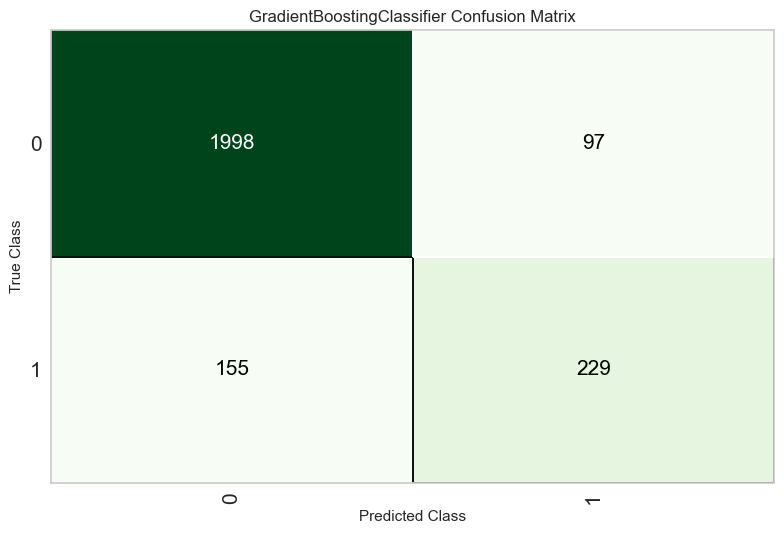

In [37]:
plot_model(tuning, plot = 'confusion_matrix')

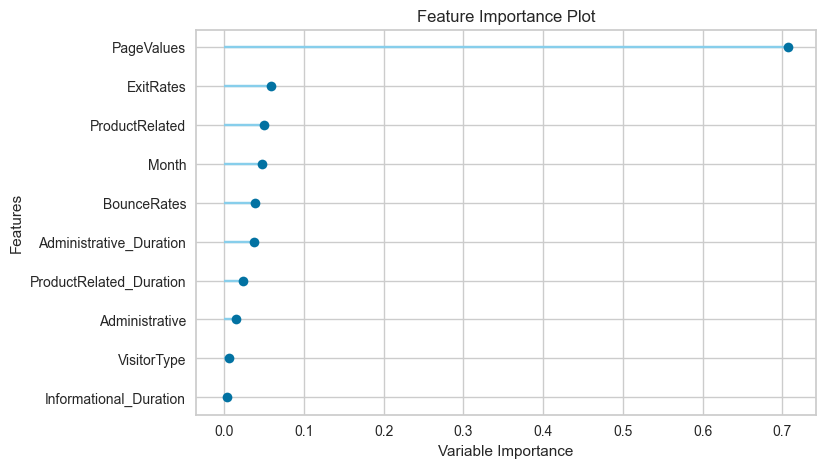

In [38]:
# Visualizando os atributos mais relevantes para a classificação
plot_model(tuning, plot='feature')

## Features mais importantes

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8739,0.8205,0.3444,0.6889,0.4593,0.3967,0.4274
1,0.8929,0.8847,0.4444,0.7692,0.5634,0.5073,0.5321
2,0.8702,0.8117,0.3596,0.6400,0.4604,0.3932,0.4144
3,0.8875,0.8774,0.4270,0.7308,0.5390,0.4799,0.5025
4,0.8720,0.8015,0.3034,0.6923,0.4219,0.3620,0.4012
5,0.8772,0.8239,0.3483,0.7045,0.4662,0.4056,0.4379
6,0.8997,0.8788,0.4494,0.8163,0.5797,0.5281,0.5585
7,0.8737,0.8149,0.4045,0.6429,0.4966,0.4286,0.4436
8,0.8979,0.8700,0.4444,0.8163,0.5755,0.5232,0.5545


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


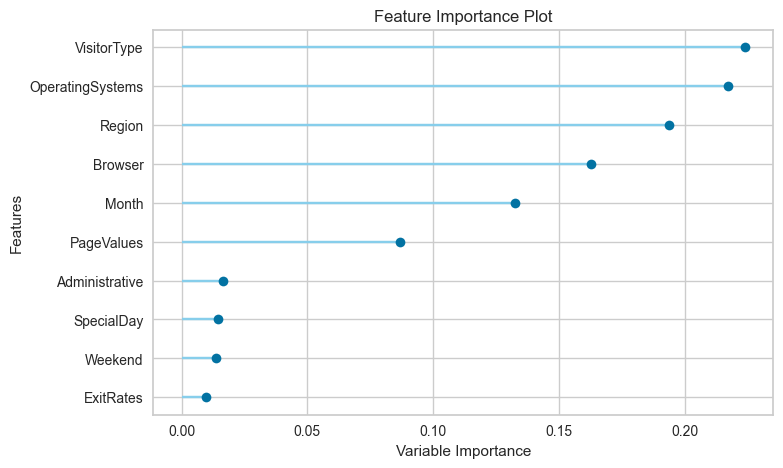

In [39]:
# Mostra as features mais importantes do modelo de regressão logística
logisticreg = tune_model(lr)
plot_model(logisticreg, plot='feature')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8981,0.9129,0.5889,0.7067,0.6424,0.5836,0.5869
1,0.9050,0.9286,0.6333,0.7215,0.6746,0.6192,0.6210
2,0.8927,0.8979,0.5506,0.6901,0.6125,0.5512,0.5559
3,0.9100,0.9364,0.6292,0.7467,0.6829,0.6310,0.6341
4,0.8824,0.9058,0.5169,0.6479,0.5750,0.5077,0.5121
5,0.9100,0.9047,0.6629,0.7284,0.6941,0.6415,0.6425
6,0.9118,0.9235,0.6404,0.7500,0.6909,0.6398,0.6425
7,0.8858,0.9252,0.5843,0.6420,0.6118,0.5450,0.5458
8,0.9083,0.9471,0.6778,0.7176,0.6971,0.6432,0.6435


Fitting 10 folds for each of 10 candidates, totalling 100 fits


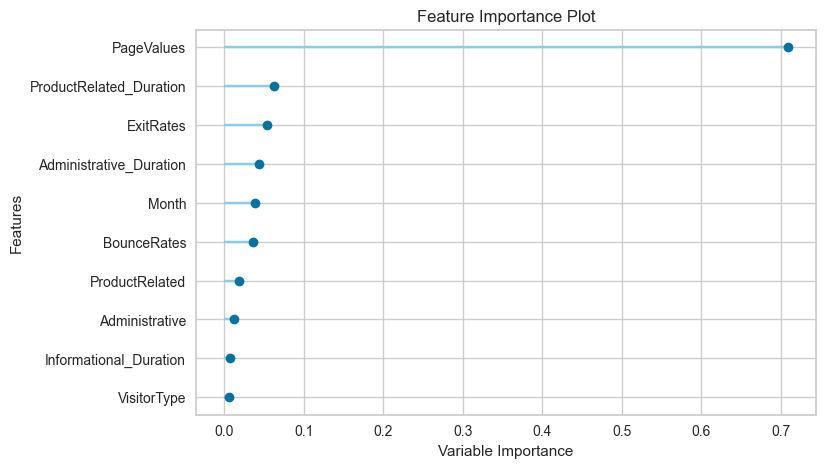

In [40]:
# Mostra as features mais importantes do modelo Gradient Boosting Classifier
gradienttune = tune_model(gradient)
plot_model(gradienttune, plot='feature')